<a href="https://colab.research.google.com/github/nurfnick/Calculus_1/blob/main/Python/Project_Part2_Limits_Derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 2:  Hints and Tips

I am going to load all the packages I think I'll need here first.

In [1]:
import numpy as np
from sympy import *

## Limits

Computing a limit is fairly straight forward using `sympy`

In [2]:
from sympy.core.numbers import Infinity
x = symbols('x')

f = (3*x**2-2)/(5*x**2+x-4)

limit(f,x,Infinity())

3/5

Above I computed an infinite limit!
$$
\lim_{x\to\infty}\frac{3x^2-2}{5x^2+x-4}
$$

Sometimes for the limit we are interested in the precise definition.  When we say that 
$$
\lim_{x\to\infty}f(x) = L
$$
We mean that for every $\epsilon>0$ there exists an $M>0$ such that when $x>M$, then  $|f(x)-L|<\epsilon$.

If we were given $\epsilon = 0.1$, how would we find the $M$ that permits us to be within that tollerance?  Essentially this is asking:

$$
\left|\frac{3x^2-2}{5x^2+x-4}-\frac35\right|<\frac1{10}
$$

To do this, I'll attempt to solve the equality not the inequality!  I'll solve it for both the positive value $\frac1{10}$ and the negative value $-\frac1{10}$.

In [3]:
solve(f-7/10,x)#why 7/10? 7/10 = 3/5+1/10

[-2.14568322948010, 0.745683229480096]

In [4]:
solve(f-5/10,x)

[0.0, 1.00000000000000]

There are four solutions here, we need to interpret the correct one.  We wanted $M$ to be positive so that eliminates two of them.  Next I want to take just the largest one since I want this to work for all values after.  If I take the smaller, there is a spot where it might break.  So $M=1$.  Let's numerically check!

In [5]:
f.subs(x,1)-3/5

-0.100000000000000

In [6]:
f.subs(x,.745683229)-3/5

0.0999999985360309

We see that 0.1 appearing in both of these.  Let's check that for the rest of time the difference stays small!

In [7]:


for i in range(1,10000,1000):#this tests from 1 to 10,000 in steps of 1,000
  print(abs(f.subs(x,i)-3/5)<.1)

True
True
True
True
True
True
True
True
True
True


All above are true so I have shown that the limit works!  Be careful about getting the right number for your $M$ or $\delta$!

## Limit That Isn't Going To Infinity

What if instead we look at a limit as x tends to a value?

$$
\lim_{x\to 2}\frac{x^2-4}{x-2}
$$

In [8]:
f = (x**2-4)/(x-2)

limit(f,x,2)

4

So let's set $\epsilon = 0.01$ and see if we can find the $\delta$ that does it.

In [9]:
solve(f-4-.01,x)

[2.01000000000000]

In [10]:
solve(f-4+.01,x)

[1.99000000000000]

So it looks here that if $1.99<x<2.01$ then the limit will be close to it's true value.  This means that $\delta = 0.01$.

If I want to check this, I should be looking at points that fall in this range but not 2.  Let's see that in the following code:

In [11]:
x1 = np.linspace(1.99001,2.009999,10)
list = []
for i in x1:
  print(f.subs(x,i),i)
  list.append(abs(f.subs(x,i)-4)<0.01)

list


3.99000999999999 1.99001
3.99223100000002 1.992231
3.99445200000003 1.9944520000000001
3.99667299999999 1.9966730000000001
3.99889399999996 1.9988940000000002
4.00111500000025 2.001115
4.00333600000009 2.003336
4.00555699999994 2.005557
4.00777800000002 2.007778
4.00999900000000 2.009999


[True, True, True, True, True, True, True, True, True, True]

In [12]:
x1

array([1.99001 , 1.992231, 1.994452, 1.996673, 1.998894, 2.001115,
       2.003336, 2.005557, 2.007778, 2.009999])

A word of warning for the assignment!  `math.e` is different from `sympy.E`.  Use `E`!


In [13]:
f = (E**(4*x)-1)/x
f

(exp(4*x) - 1)/x

Looks like you need the `nsolve` to get one of the endpoints.  To apply the `nsolve` you'll need a point close to the solution.  You can find this by examining the outputs of $f$ or by plotting.  For instance, using the above function and try to solve 
$$
\frac{e^{4x}-1}x = 4.5
$$

In [14]:
nsolve(f-4.5,x,5)

ValueError: ignored

The number 5 is not close enough to the solution!  If I pick 1,

In [15]:
nsolve(f-4.5,x,1)

0.0577792007362896

It works!  We could see that 1 is close to that solution! I could have even done better but you'll just need to be close to the actual solution.

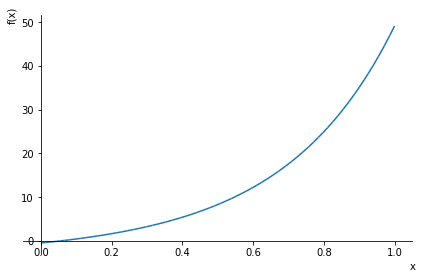

In [16]:
plot(f-4.5,(x,0.0001,1))

## Derivatives 

These aren't terrible either!

In [ ]:
f.diff(x)

This is the derivative.  I could check it by doing the limit!

$$
f'(a) = \lim_{x\to a}\frac{f(x)-f(a)}{x-a}
$$

In [ ]:
a = symbols('a')

limit((f-f.subs(x,a))/(x-a),x,a).simplify()

In [ ]:
f.diff(x).simplify()

These do agree after adding the `.simplify()` command!

## Equation of the Tangent Line

If I wanted the equation of the tangent line, I could find,
$$
y = m(x-x_0)+y_0
$$
where $m = f'(x_0)$.

So taking my equation above and using $x_0 = 1$.

In [ ]:
line = f.diff(x).subs(x,1)*(x-1)+f.subs(x,1)

line

In [ ]:
from sympy.plotting import plot

plot(f,line , (x,0.9,2))#I changed the domain of the plot to better see the tangent touch

We see that at 1 it comes in and just touches the graph!